In [31]:
# import
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [46]:
# load dataset
# load the MNIST dataset, containing 70,000 28x28 images showing handwritten digits.
# load this dataset using Kera
# function returns the dataset split into train and test sets.

# x_train and x_test contain our train and test images.
# y_train and y_test contain the target values: a number between 0 and 9 indicating the digit shown in the corresponding image.
# 60,000 images to train the model and 10,000 to test it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [48]:
# preprocess dataset
# train data
# When dealing with images, we need a tensor with 4 dimensions: batch size, width, height, and color channels.
# x_train/y_train are (60000, 28, 28). Need to reshape it to add the missing dimension ("1" because these images are grayscale.)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# Each pixel goes from 0 to 255. Neural networks work much better with smaller values.
# Need to normalize pixels by dividing them by 255. That way, each pixel will go from 0 to 1.
x_train = x_train.astype('float32') / 255.0
# Target values go from 0 to 9 (the value of each digit.)
# This line one-hot encodes these values.
# For example, this will transform a value 5, in an array of zeros with a single 1 corresponding to the seventh position:
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train = to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

# test data
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test)

(60000, 28, 28, 1)
(60000, 10, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [34]:
# variables
num_classes = 10
input_shape = (28, 28, 1)

# build the model
# a sequence of conv2D/MaxPool blocks plus a classifier
model = Sequential()

# Input layer
# input shape: a 28x28x1 tensor (width, height, channels)
model.add(Input(shape=input_shape))

# ConvNet Block 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ConvNet Block 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [41]:
# compile the model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
# validation data
x_val = x_test
y_val = y_test

In [43]:
# train the model
batch_size = 32
epochs = 15

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0251 - val_accuracy: 0.9916
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0273 - val_accuracy: 0.9914
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0208 - val_accuracy: 0.9934
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0232 - val_accuracy: 0.9918
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0244 - val_accuracy: 0.9929
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0258 - val_accuracy: 0.9933
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.0291 - val_ac

In [9]:
def plot_loss(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    print(epochs)

    # Visualize the loss
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    print(epochs)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

range(1, 16)


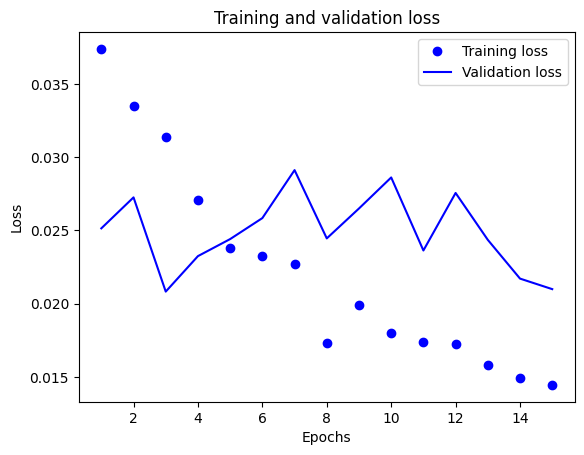

range(1, 16)


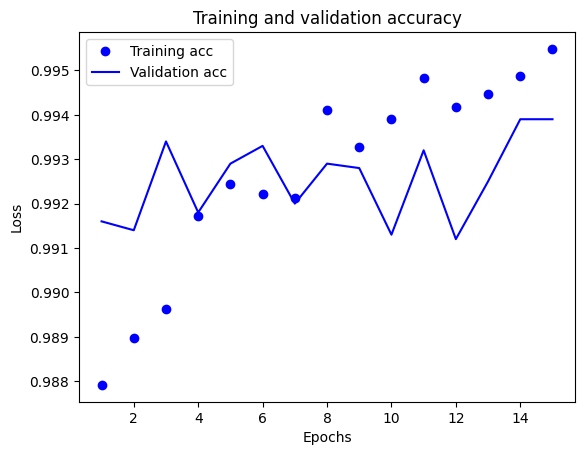

In [44]:
history_dict = history.history
plot_loss(history_dict)
plot_accuracy(history_dict)

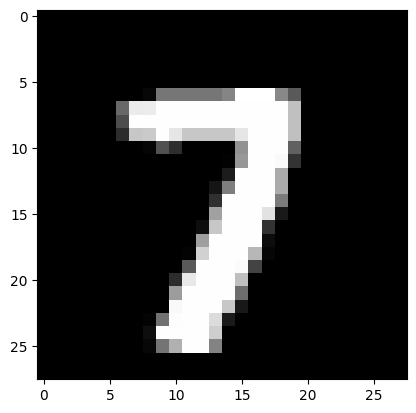

image.shape (1, 28, 28, 1)
1/1 [==============================] - 0s 25ms/step
pred_probs: (1, 10)
pred_probs: [0.08267233 0.16987611 0.05977267 0.06053055 0.14313312 0.06565986
 0.06524762 0.10319264 0.15694326 0.0929719 ]
Prediction: 1


In [45]:
# prediction workflow
# get an image
image = random.choice(x_test)

# show the image
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

# pre-process image / build a batch of one image to predict
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0
print('image.shape', image.shape)

# predict
pred_probs = model.predict(image)
# print out probs of the batch
print('pred_probs:', pred_probs.shape)
print('pred_probs:', pred_probs[0])
# get index/class of max prob
pred = np.argmax(pred_probs, axis=1)
print("Prediction:", pred[0])